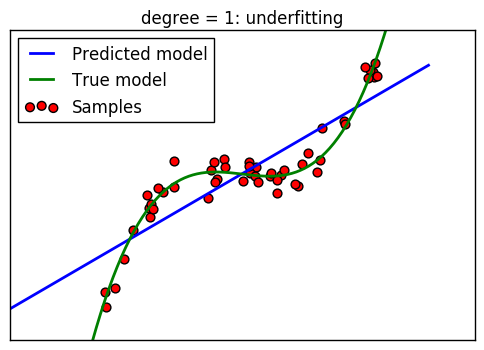

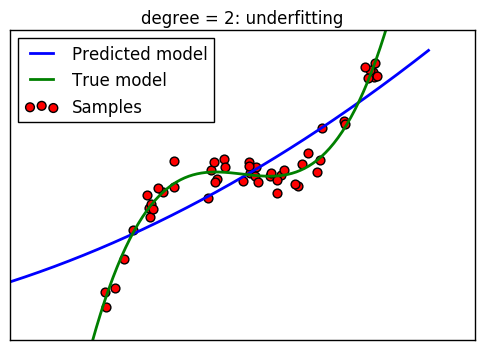

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
np.random.seed(4)
from sklearn import datasets, linear_model

N = 50
X = np.random.rand(N, 1)*6
y = 5*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

def buildX(X, d = 2):
    res = np.ones((X.shape[0], 1))
    for i in xrange(1, d+1):
        res = np.concatenate((res, X**i), axis = 1)
    return res 

def myfit(X, y, d):
    Xbar = buildX(X, d)
    regr = linear_model.LinearRegression(fit_intercept=False) # fit_intercept = False for calculating the bias
    regr.fit(Xbar, y)

    w = regr.coef_
    # Display result
    w_0 = w[0][0]
    w_1 = w[0][1]
    x0 = np.linspace(-2, 7, 200, endpoint=True)
    y0 = np.zeros_like(x0)
    ytrue = 5*(x0 - 2)*(x0-3)*(x0-4)
    for i in xrange(d+1):
        y0 += w[0][i]*x0**i

    # Draw the fitting line 
    plt.scatter(X.T, y.T, c = 'r', s = 40, label = 'Samples')     # data 
    
    plt.plot(x0, y0, 'b', linewidth = 2, label = "Predicted model")   # the fitting line
    plt.plot(x0, ytrue, 'g', linewidth = 2, label = "True model")   # the fitting line
    plt.xticks([], [])
    plt.yticks([], [])
    if d < 4:
        str1 = 'underfitting'
    elif d == 4:
        str1 = 'fit'
    else:
        str1 = 'overfitting'
    str0 = 'degree = ' + str(d) + ': ' + str1
    plt.title(str0)
    plt.axis([-2, 8, np.amin(y) - 30, np.amax(y) + 30])
    plt.legend(loc="best")
    
    fn = 'linreg_' + str(d) + '.png'
    plt.savefig(fn, bbox_inches='tight', dpi = 600)
    plt.show()
#     print(w)

myfit(X, y, 1)
myfit(X, y, 2)
myfit(X, y, 4)
myfit(X, y, 8)
myfit(X, y, 20)

